<a href="https://colab.research.google.com/github/sivalinga438/EDA_project/blob/main/22BDS0339.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
sns.set(style="whitegrid")

In [35]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/prison.csv"
df = pd.read_csv(url)
df.head()

,rownames,state,year,govelec,black,metro,unem,criv,crip,lcriv,...,cag18_24,cag25_34,cunem,cblack,cmetro,pris,lpris,gpris,final1,final2
0,1,1,80,0,0.2560,0.6320,0.08775,4.447868,44.476376,1.492425,...,0.000077,0.001990,0.01675,-0.059999,0.0002,141.334717,4.951131,-0.020659,0,0
1,2,1,81,0,0.2557,0.6362,0.10667,4.700944,44.248787,1.547763,...,0.000177,0.004632,0.01892,-0.030001,0.0042,163.533646,5.097019,0.145888,0,0
2,3,1,82,1,0.2554,0.6404,0.14367,4.497580,42.050446,1.503539,...,-0.000712,0.000013,0.03700,-0.029999,0.0042,183.694809,5.213276,0.116257,0,0
3,4,1,83,0,0.2551,0.6446,0.13667,4.186833,37.084393,1.431945,...,-0.001318,0.001163,-0.00700,-0.030001,0.0042,218.624207,5.387354,0.174078,0,0
4,5,1,84,0,0.2548,0.6488,0.11167,4.353239,35.042255,1.470920,...,-0.002618,0.001297,-0.02500,-0.030001,0.0042,245.068619,5.501538,0.114184,0,0


In [36]:
# 3. Dimensions
print("Dataset Dimensions (rows, columns):", df.shape)

Dataset Dimensions (rows, columns): (714, 46)


In [37]:
# 4. Summary Statistics
print("\n--- Info ---")
print(df.info())

print("\n--- Summary Statistics (Numerical) ---")
print(df.describe())


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  714 non-null    int64  
 1   state     714 non-null    int64  
 2   year      714 non-null    int64  
 3   govelec   714 non-null    int64  
 4   black     714 non-null    float64
 5   metro     714 non-null    float64
 6   unem      714 non-null    float64
 7   criv      714 non-null    float64
 8   crip      714 non-null    float64
 9   lcriv     714 non-null    float64
 10  lcrip     714 non-null    float64
 11  gcriv     714 non-null    float64
 12  gcrip     714 non-null    float64
 13  y81       714 non-null    int64  
 14  y82       714 non-null    int64  
 15  y83       714 non-null    int64  
 16  y84       714 non-null    int64  
 17  y85       714 non-null    int64  
 18  y86       714 non-null    int64  
 19  y87       714 non-null    int64  
 20  y88       714 non-

In [38]:
# 5. Data Handling
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
print("\nDuplicate Rows Count:", df.duplicated().sum())


Missing Values in Each Column:
rownames    0
state       0
year        0
govelec     0
black       0
metro       0
unem        0
criv        0
crip        0
lcriv       0
lcrip       0
gcriv       0
gcrip       0
y81         0
y82         0
y83         0
y84         0
y85         0
y86         0
y87         0
y88         0
y89         0
y90         0
y91         0
y92         0
y93         0
ag0_14      0
ag15_17     0
ag18_24     0
ag25_34     0
incpc       0
polpc       0
gincpc      0
gpolpc      0
cag0_14     0
cag15_17    0
cag18_24    0
cag25_34    0
cunem       0
cblack      0
cmetro      0
pris        0
lpris       0
gpris       0
final1      0
final2      0
dtype: int64

Duplicate Rows Count: 0


In [39]:
# 6. Data Cleaning
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [40]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("\nAfter Cleaning - Missing Values:")
print(df.isnull().sum())


After Cleaning - Missing Values:
rownames    0
state       0
year        0
govelec     0
black       0
metro       0
unem        0
criv        0
crip        0
lcriv       0
lcrip       0
gcriv       0
gcrip       0
y81         0
y82         0
y83         0
y84         0
y85         0
y86         0
y87         0
y88         0
y89         0
y90         0
y91         0
y92         0
y93         0
ag0_14      0
ag15_17     0
ag18_24     0
ag25_34     0
incpc       0
polpc       0
gincpc      0
gpolpc      0
cag0_14     0
cag15_17    0
cag18_24    0
cag25_34    0
cunem       0
cblack      0
cmetro      0
pris        0
lpris       0
gpris       0
final1      0
final2      0
dtype: int64


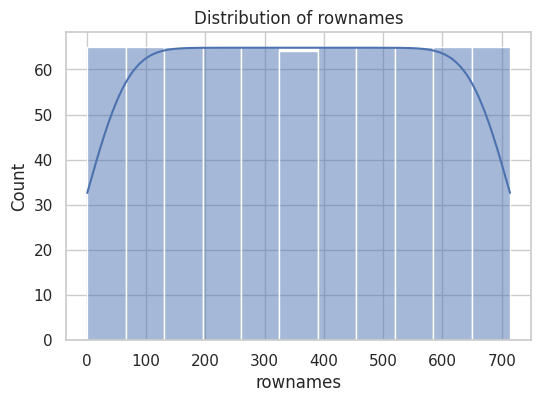

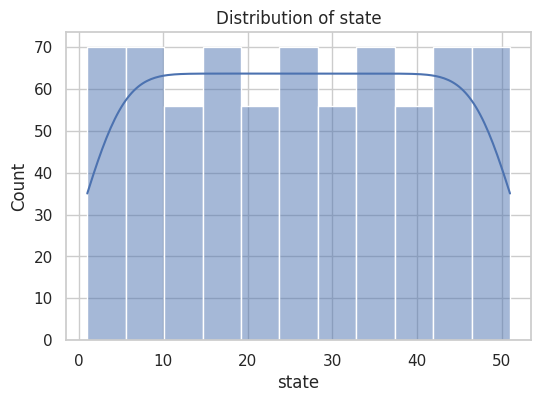

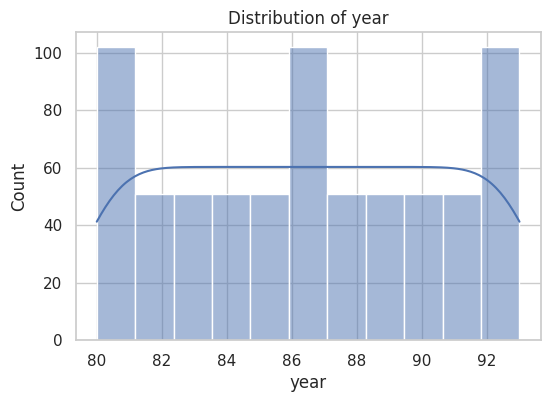

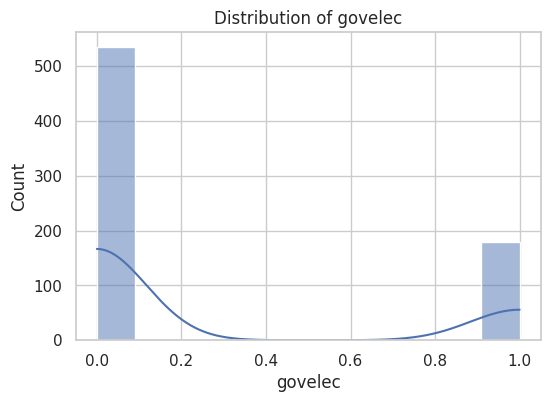

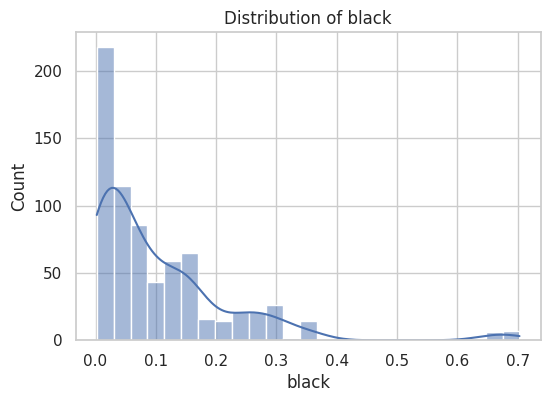

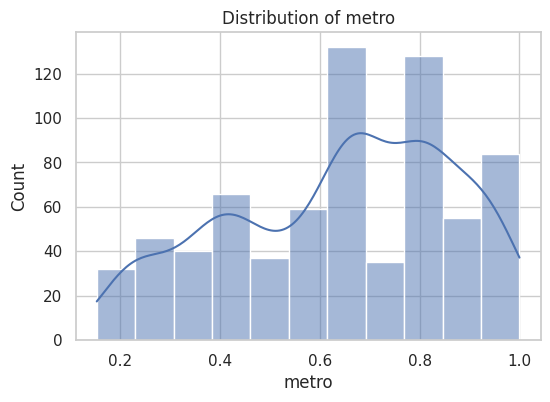

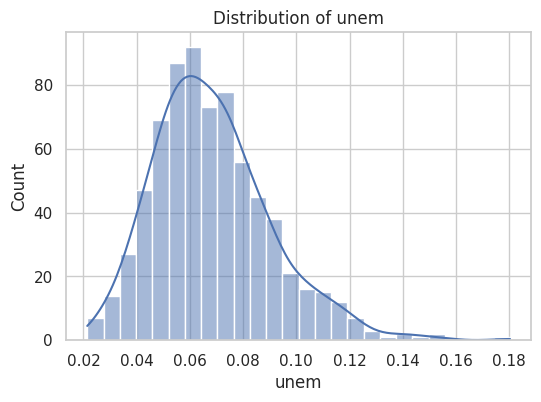

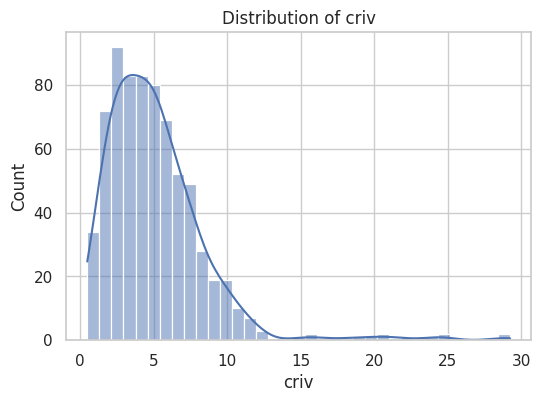

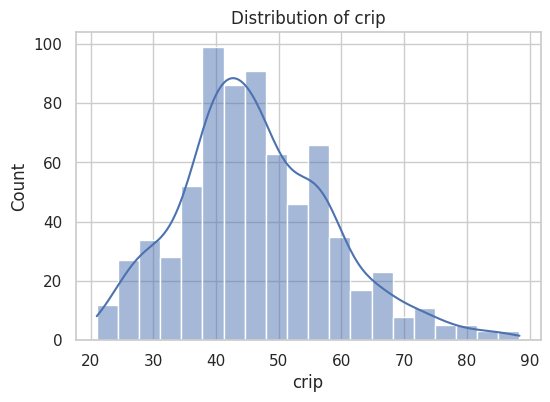

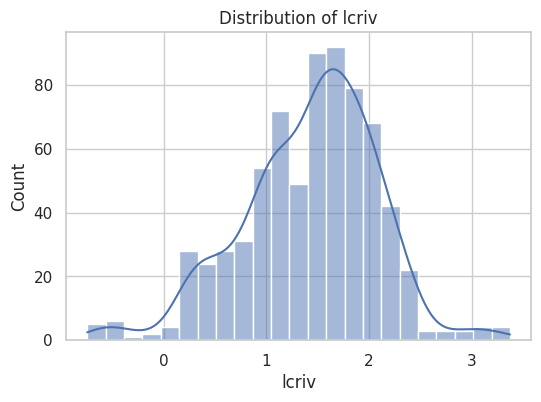

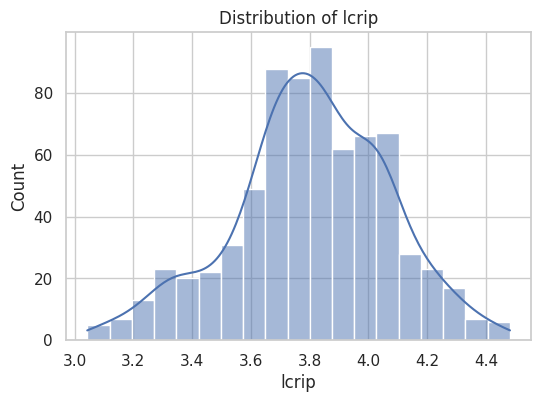

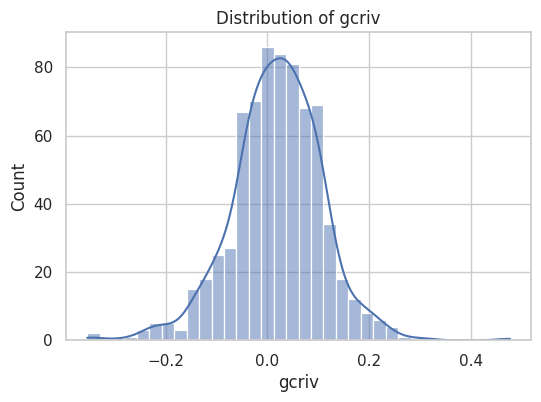

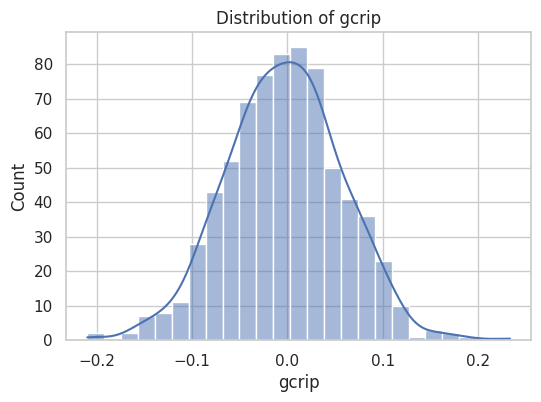

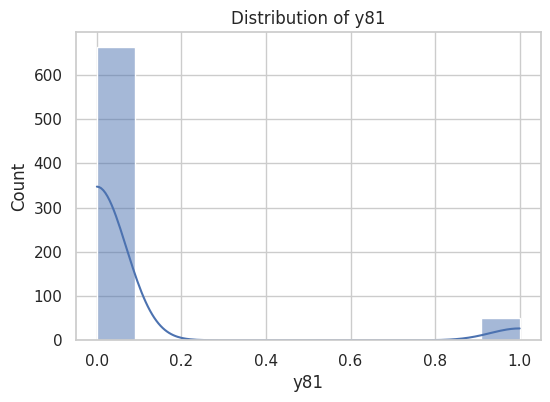

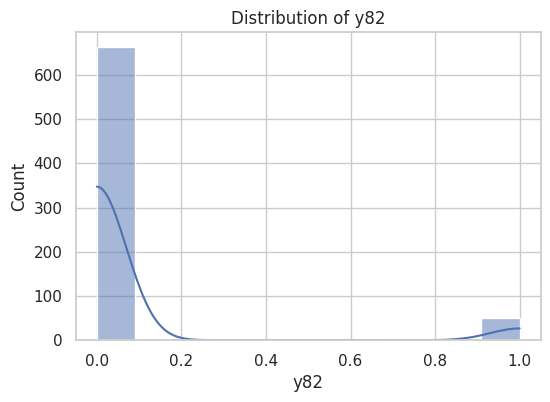

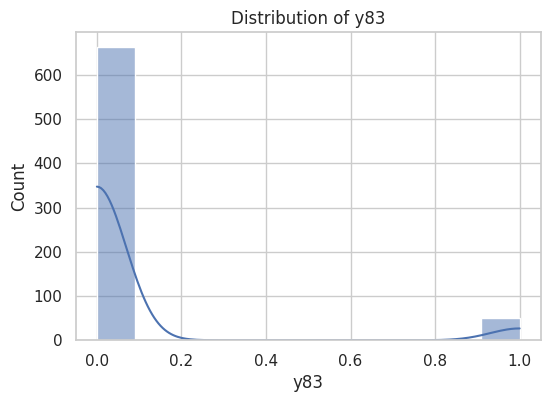

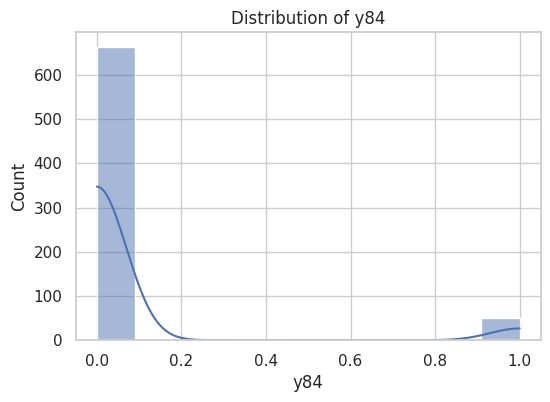

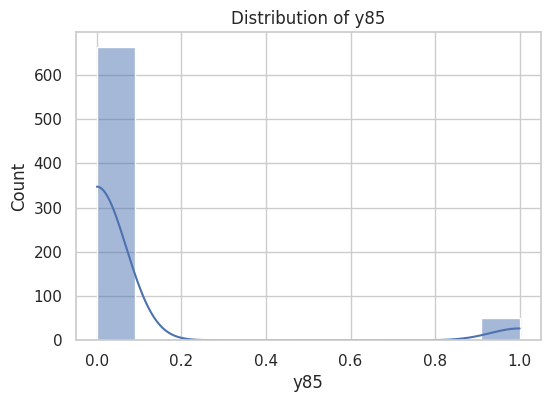

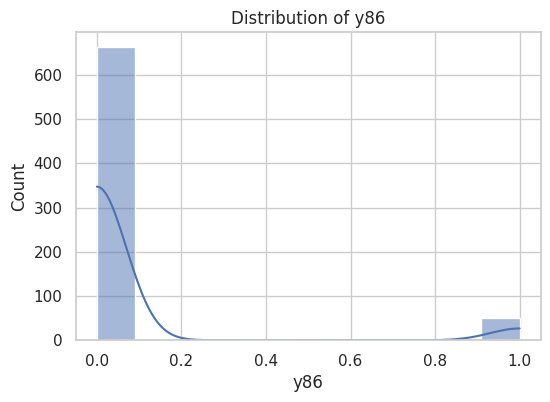

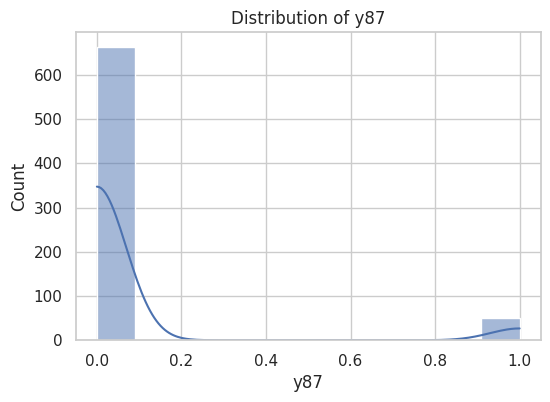

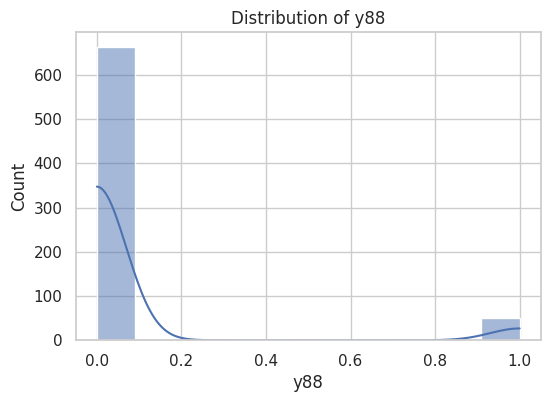

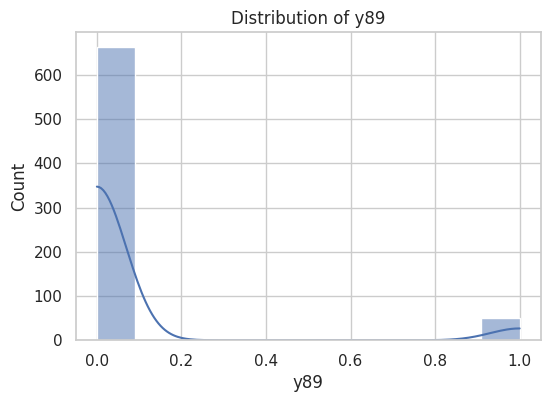

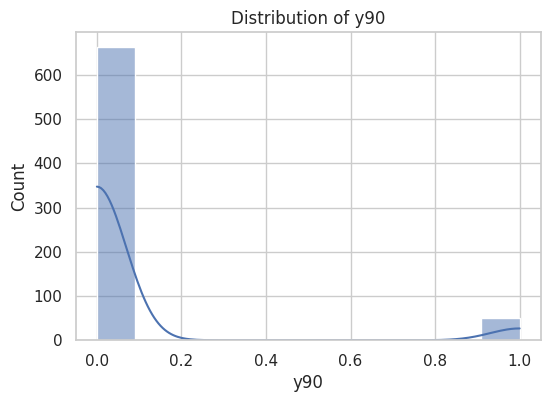

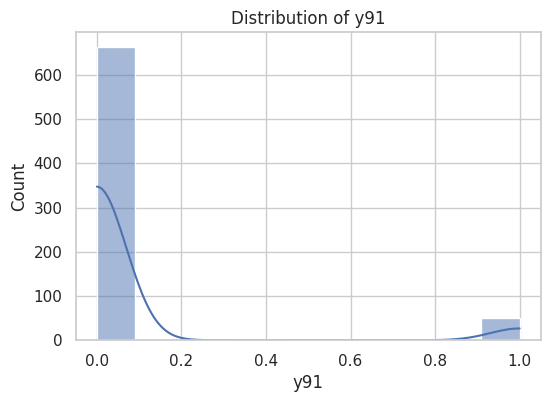

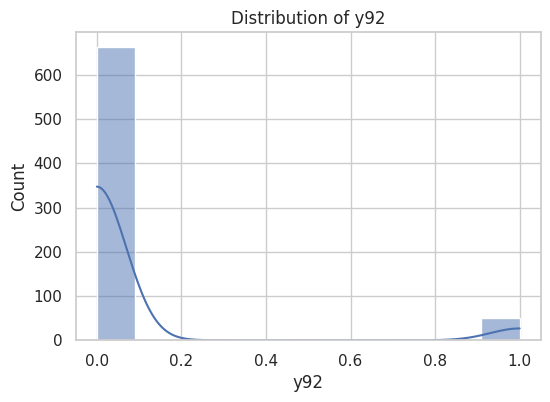

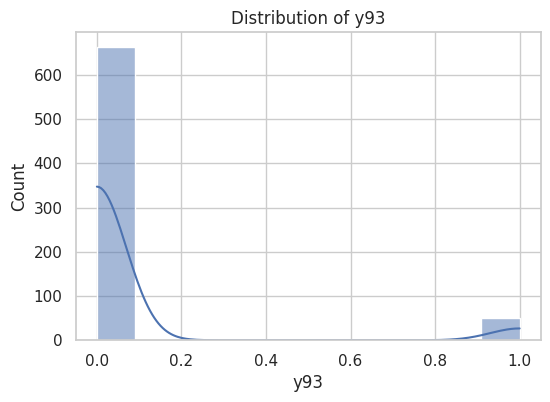

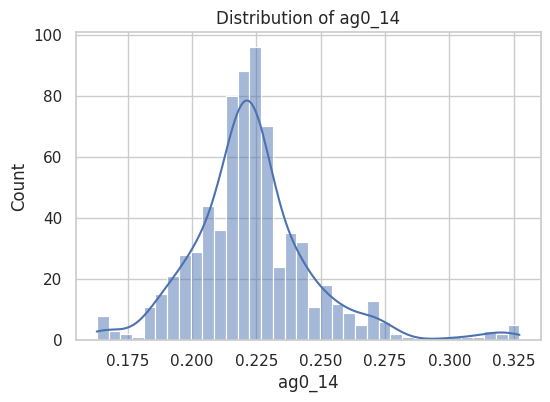

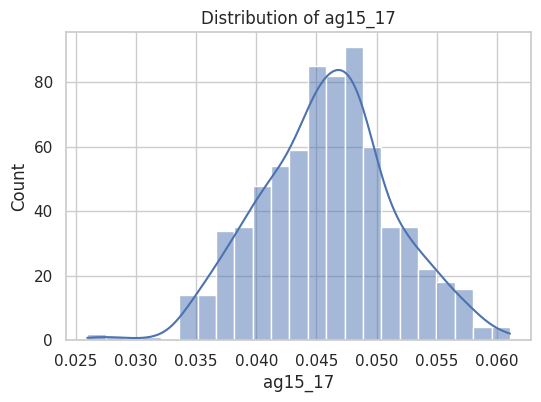

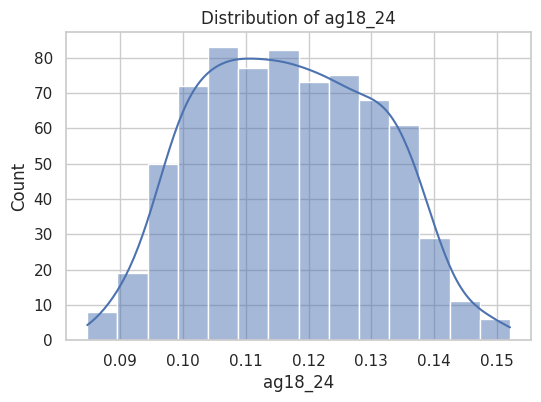

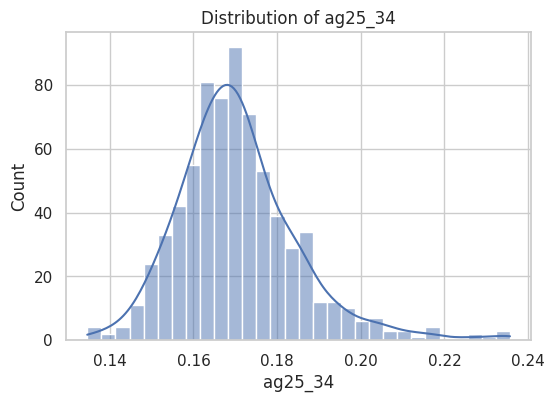

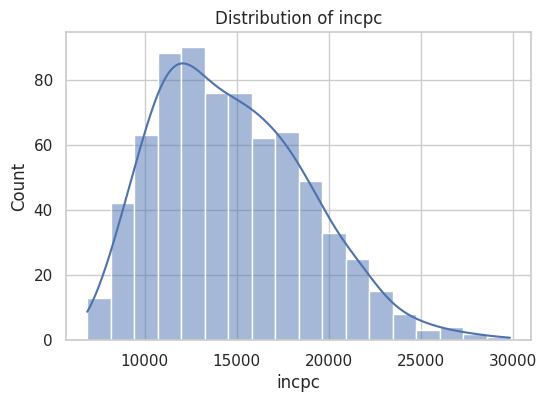

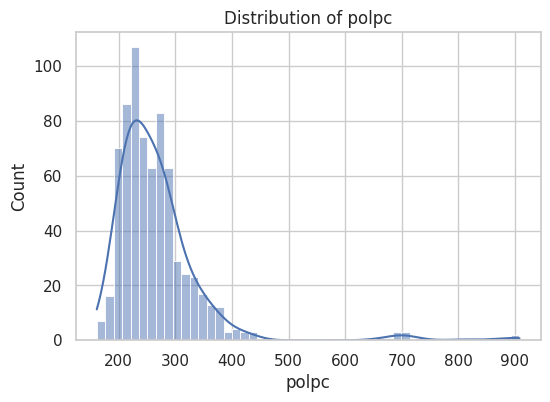

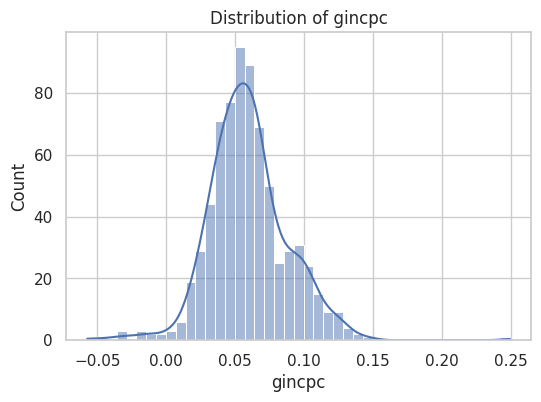

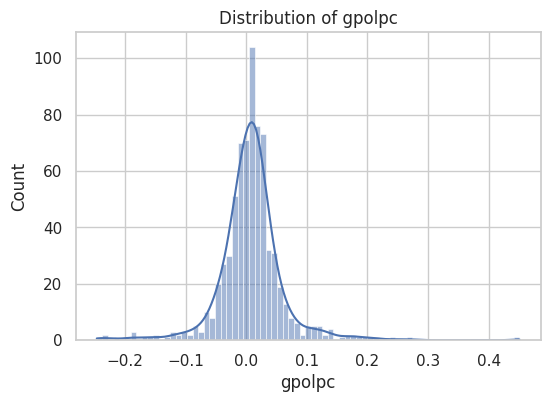

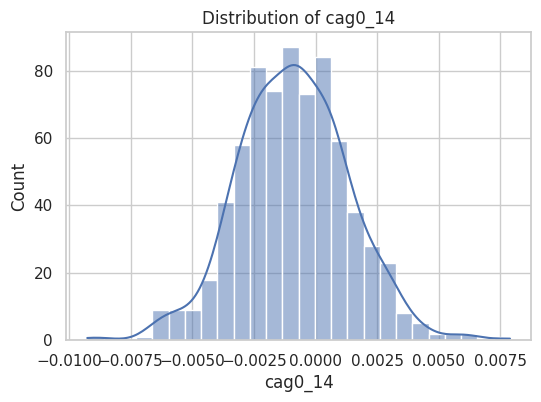

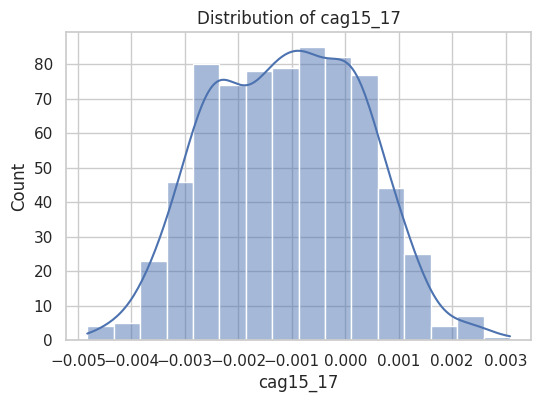

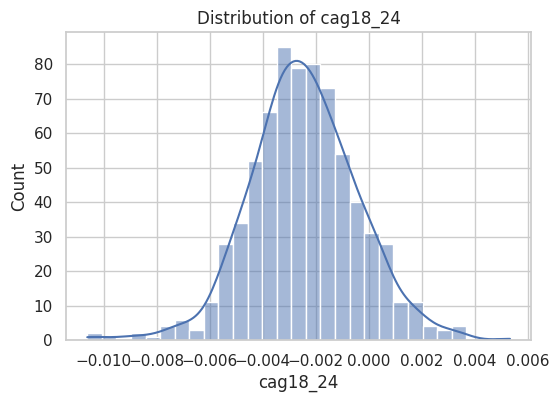

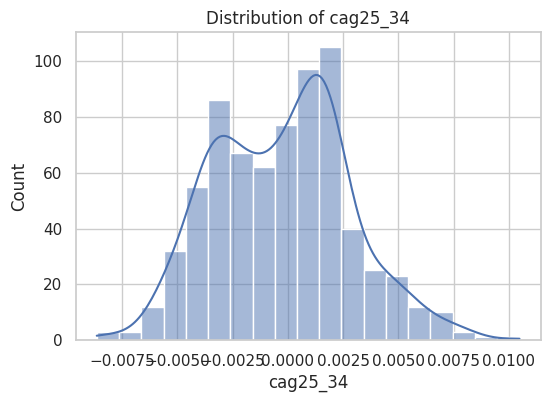

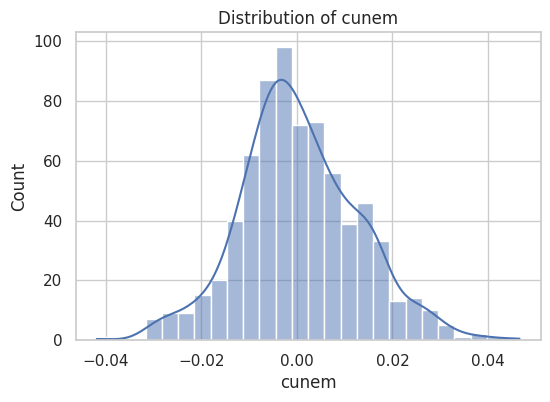

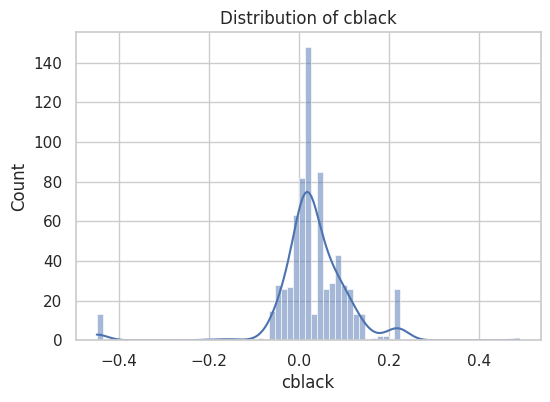

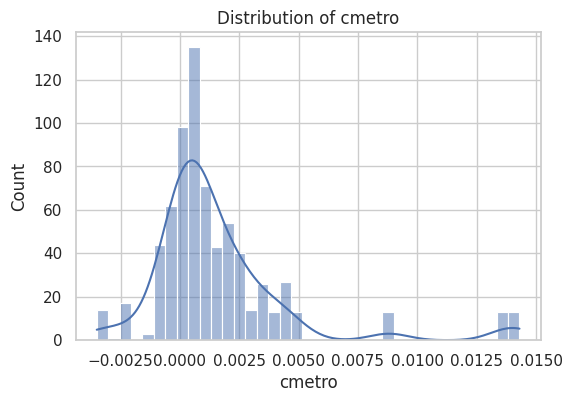

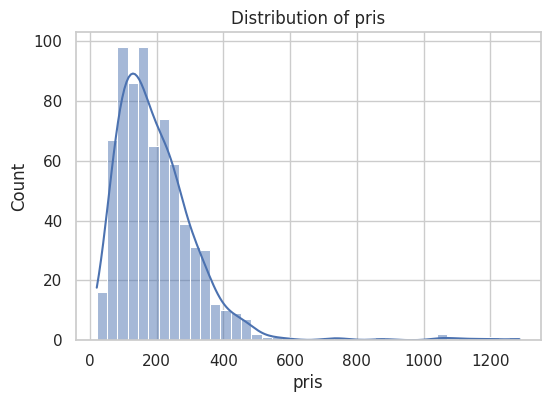

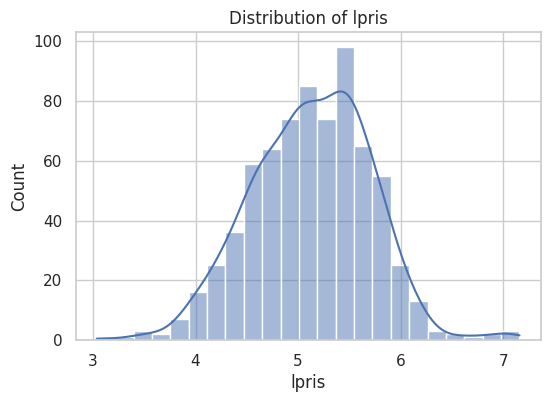

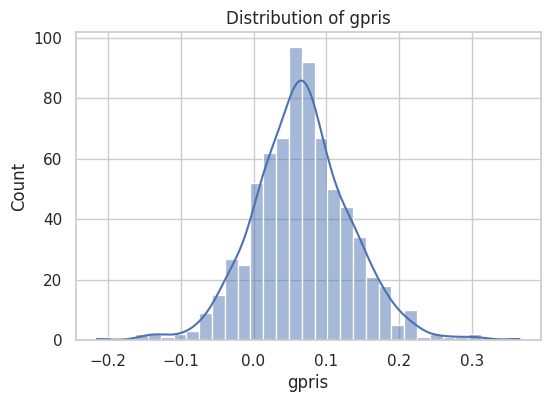

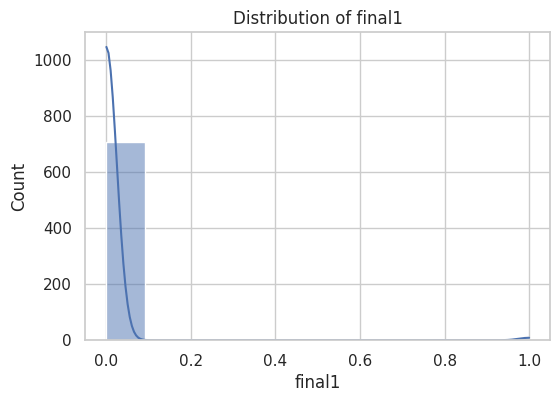

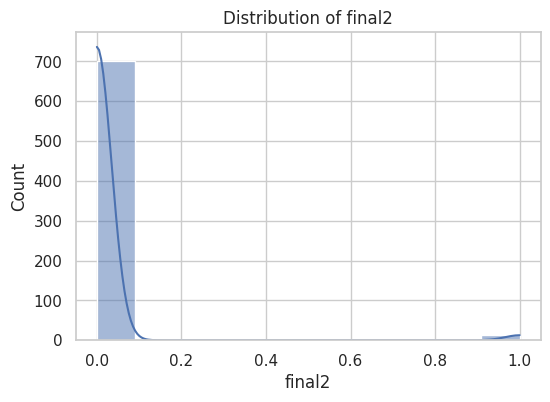

In [41]:
# 7. Univariate Analysis (Numerical Columns)
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

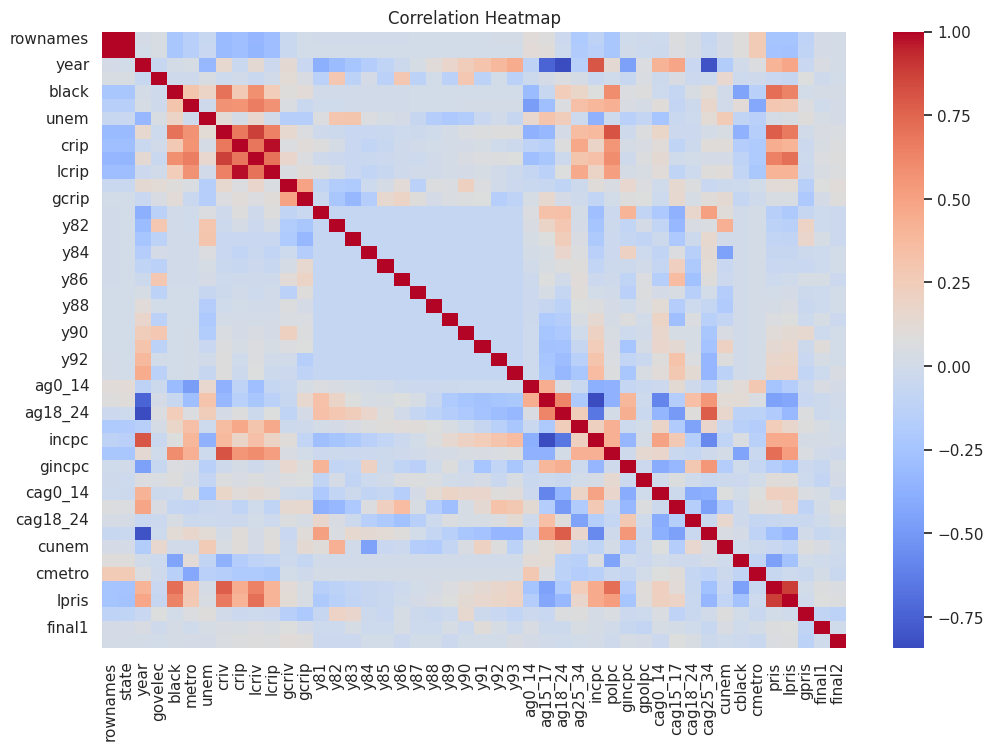

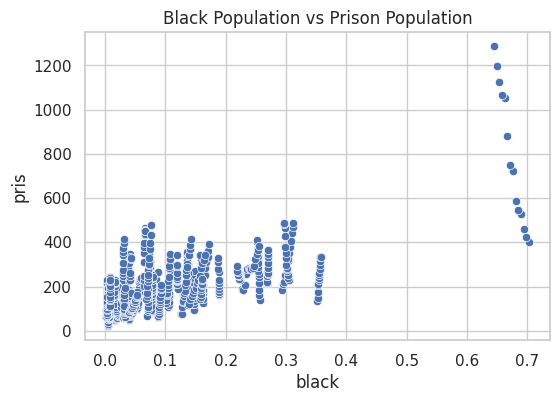

In [42]:
# 8. Bivariate Analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#scatterplot between two variables
plt.figure(figsize=(6,4))
sns.scatterplot(x='black', y='pris', data=df)
plt.title('Black Population vs Prison Population')
plt.show()

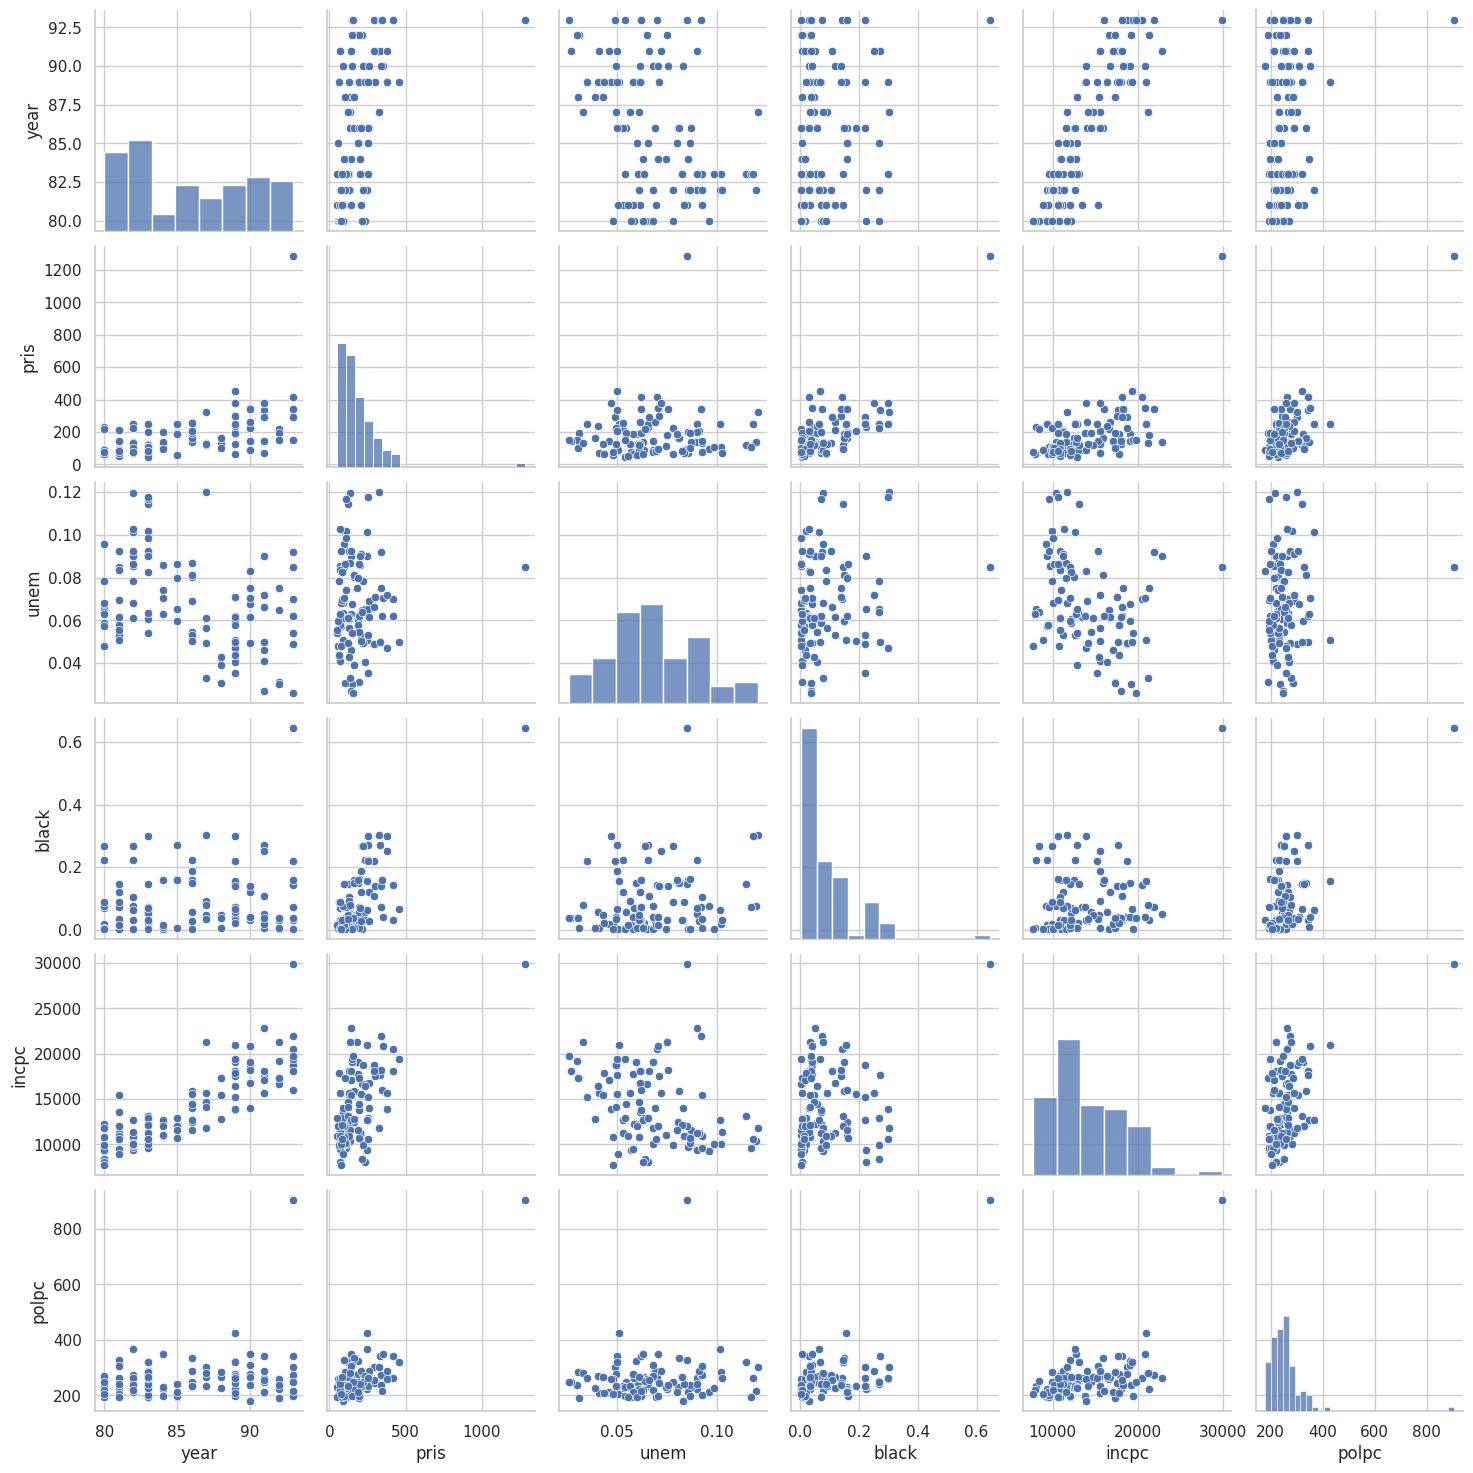


Average Values by Decade:
         pris  unem  black
decade                   
1980s    NaN   NaN    NaN
1990s    NaN   NaN    NaN


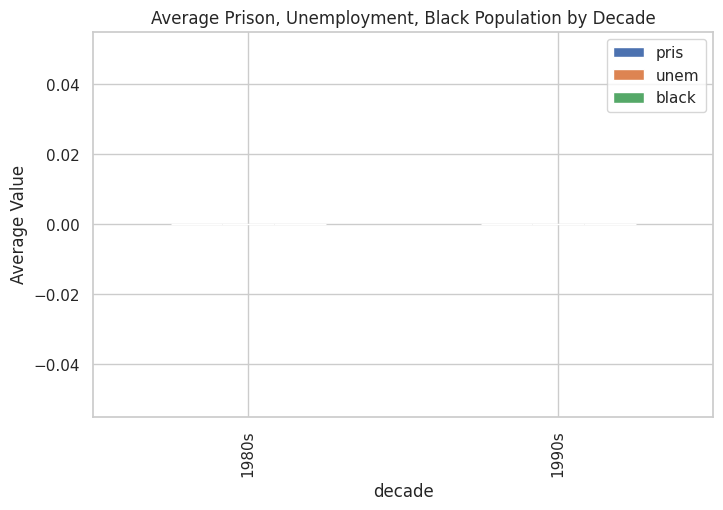

In [43]:
# Multivariate Analysis
subset_cols = ['year', 'pris', 'unem', 'black', 'incpc', 'polpc']
sns.pairplot(df[subset_cols].sample(100))
plt.show()

df['decade'] = pd.cut(df['year'], bins=[1980, 1990, 2000], labels=['1980s', '1990s'])
grouped = df.groupby('decade')[['pris', 'unem', 'black']].mean()
print("\nAverage Values by Decade:\n", grouped)

grouped.plot(kind='bar', figsize=(8,5))
plt.title('Average Prison, Unemployment, Black Population by Decade')
plt.ylabel('Average Value')
plt.show()


In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [45]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (9,5)

In [46]:
print("\n=== 1D ANALYSIS ===")

# 1A. Skewness for all numeric columns
skewness = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
print("\nSkewness (numeric columns):")
display(skewness)


=== 1D ANALYSIS ===

Skewness (numeric columns):


,0
final1,10.793412
final2,7.533621
polpc,4.040439
y93,3.335212
y92,3.335212
y91,3.335212
y90,3.335212
y82,3.335212
y81,3.335212
y84,3.335212


In [47]:
# 1B. Quantiles (0, 5%, 25%, 50%, 75%, 95%, 100%) for numeric columns
quantiles = df.select_dtypes(include=np.number).quantile([0.00, 0.05, 0.25, 0.5, 0.75, 0.95, 1.00]).T
quantiles.columns = ['min','q05','q25','median','q75','q95','max']
quantiles.columns = ['min','q05','q25','median','q75','q95','max']
print("\nSelected quantiles:")
display(quantiles.head(20))


Selected quantiles:


,min,q05,q25,median,q75,q95,max
rownames,1.000000,36.650000,179.250000,357.500000,535.750000,678.350000,714.000000
state,1.000000,3.000000,13.000000,26.000000,39.000000,49.000000,51.000000
year,80.000000,80.000000,83.000000,86.500000,90.000000,93.000000,93.000000
govelec,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000
black,0.002000,0.003000,0.020250,0.071000,0.148075,0.303540,0.703000
metro,0.153000,0.233685,0.457850,0.671350,0.815925,0.955140,1.000000
unem,0.021420,0.038024,0.053000,0.066000,0.080958,0.109170,0.180330
criv,0.475628,1.318186,2.824363,4.515549,6.500603,10.244632,29.217993
crip,20.965015,27.556894,38.671989,45.185146,54.392672,67.910662,88.392731
lcriv,-0.743120,0.276256,1.038283,1.507526,1.871895,2.326753,3.374785


In [48]:
# 1C. Frequency distributions for a few example variables (binned)
# Choose a few representative numeric columns
example_cols = ['pris','unem','black','incpc','polpc']
for col in example_cols:
    if col in df.columns:
        print(f"\nValue counts (binned) for {col}:")
        binned = pd.cut(df[col], bins=6)
        display(df[col].value_counts(bins=6).sort_index())


Value counts (binned) for pris:


,count
"(19.56, 231.829]",491
"(231.829, 442.83]",200
"(442.83, 653.832]",15
"(653.832, 864.834]",2
"(864.834, 1075.836]",3
"(1075.836, 1286.838]",3



Value counts (binned) for unem:


,count
"(0.0203, 0.0479]",110
"(0.0479, 0.0744]",356
"(0.0744, 0.101]",188
"(0.101, 0.127]",51
"(0.127, 0.154]",7
"(0.154, 0.18]",2



Value counts (binned) for black:


,count
"(0.0002999999999999999, 0.119]",464
"(0.119, 0.236]",156
"(0.236, 0.353]",68
"(0.353, 0.469]",12
"(0.469, 0.586]",0
"(0.586, 0.703]",14



Value counts (binned) for incpc:


,count
"(6860.19, 10712.552]",118
"(10712.552, 14541.936]",254
"(14541.936, 18371.321]",202
"(18371.321, 22200.705]",107
"(22200.705, 26030.09]",26
"(26030.09, 29859.475]",7



Value counts (binned) for polpc:


,count
"(160.371, 285.59]",522
"(285.59, 410.062]",171
"(410.062, 534.533]",7
"(534.533, 659.004]",1
"(659.004, 783.476]",8
"(783.476, 907.947]",5


In [49]:
# 1D. Categorical variable analysis (none exist). As a workaround, create binned/categorical versions:
# Create prison-size category (low/medium/high) using tertiles
if 'pris' in df.columns:
    df['pris_cat'] = pd.qcut(df['pris'], q=3, labels=['low','medium','high'])
    print("\nprison-size categories distribution:")
    display(df['pris_cat'].value_counts())


prison-size categories distribution:


,count
pris_cat,
low,238
medium,238
high,238


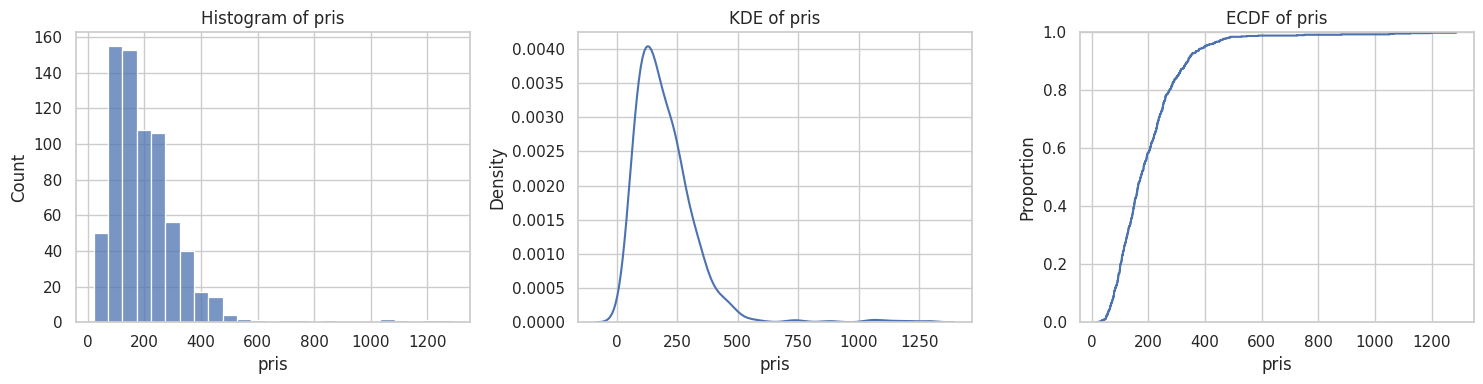

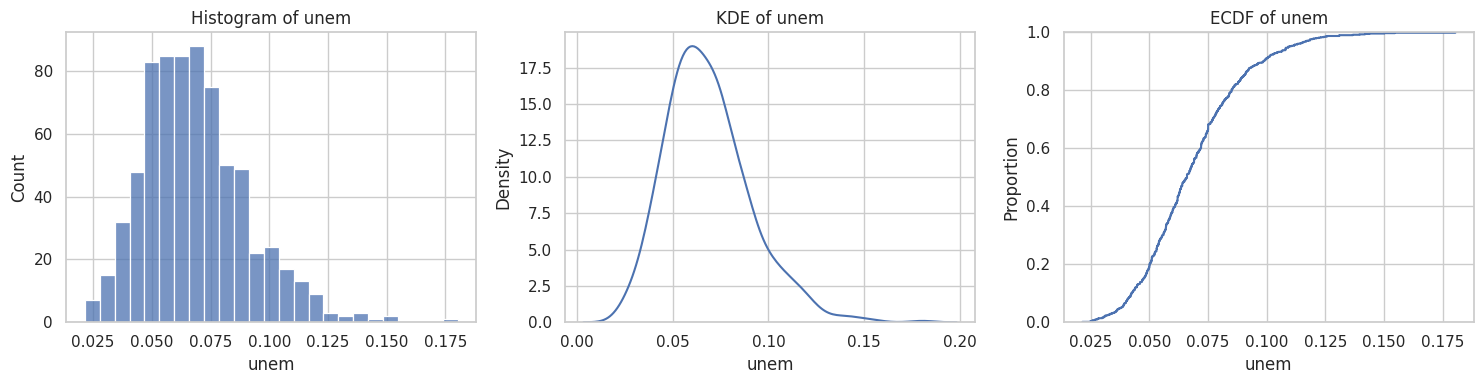

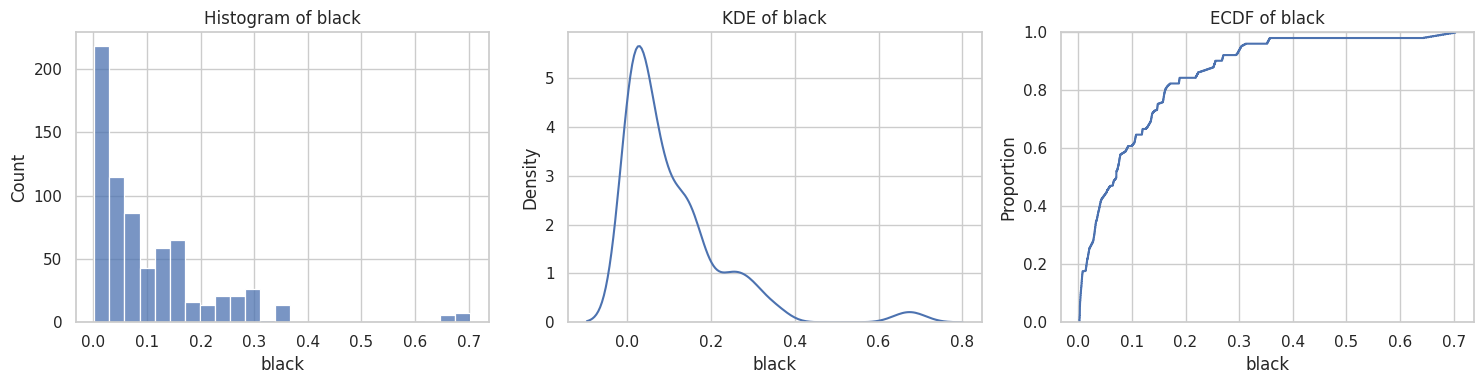

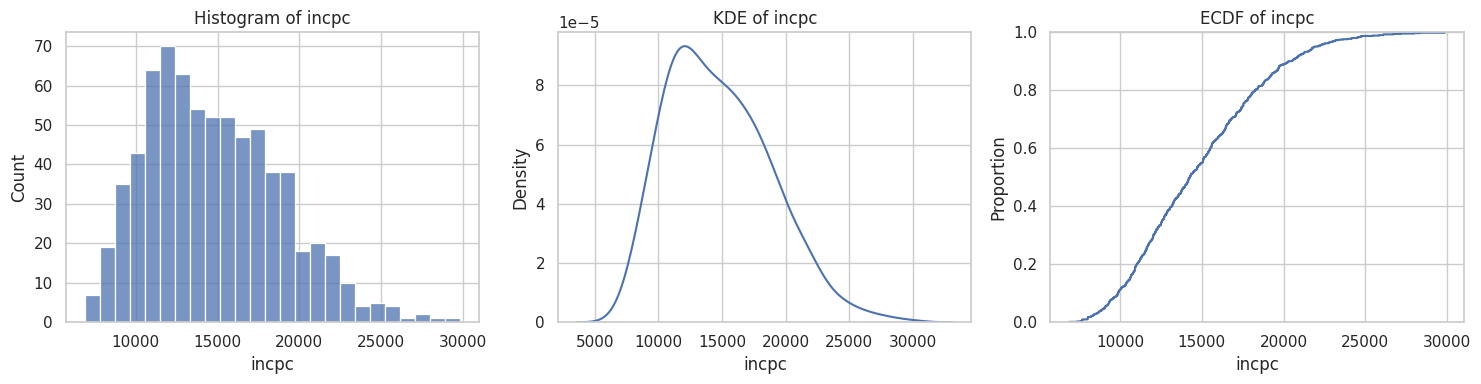

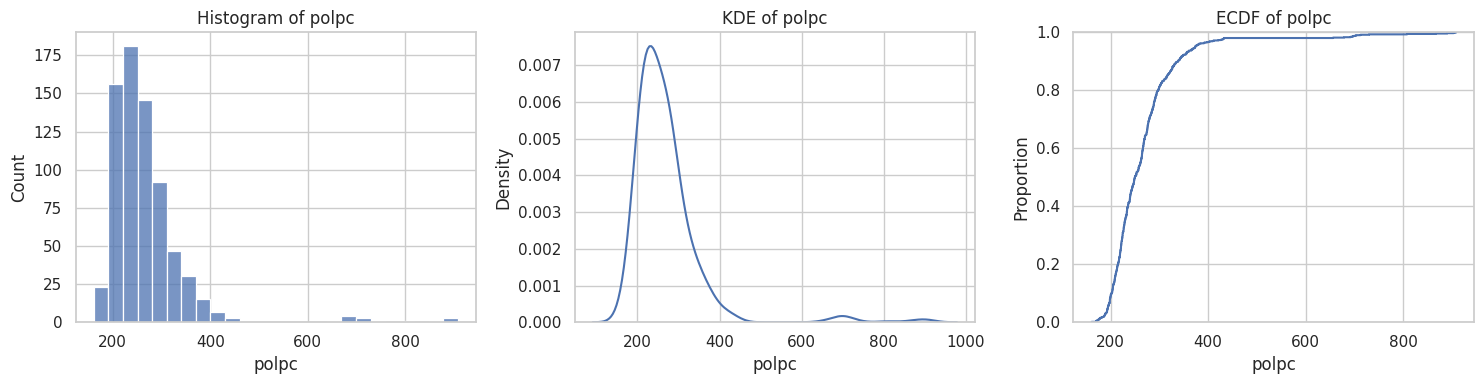

In [51]:
# 1E. 1D plotting (hist, KDE, ECDF) - for the example columns
for col in example_cols:
    if col in df.columns:
        fig, axes = plt.subplots(1,3, figsize=(15,4))
        sns.histplot(df[col], kde=False, bins=25, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        sns.kdeplot(df[col], bw_adjust=1, ax=axes[1])
        axes[1].set_title(f'KDE of {col}')
        sns.ecdfplot(df[col], ax=axes[2])
        axes[2].set_title(f'ECDF of {col}')
        plt.tight_layout()
        plt.show()


=== 2D ANALYSIS ===


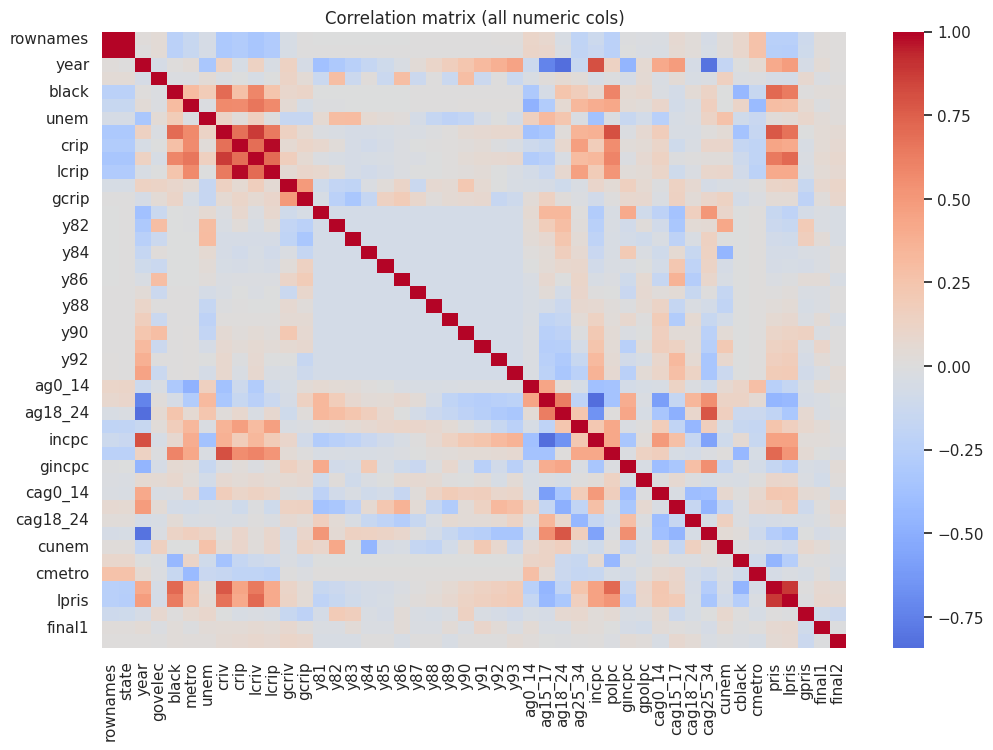


Top 10 absolute correlations:


,,0
rownames,state,0.999809
crip,lcrip,0.983260
pris,lpris,0.883898
criv,lcriv,0.875961
ag18_24,year,0.842150
ag15_17,incpc,0.837505
criv,polpc,0.811833
year,cag25_34,0.808319
incpc,year,0.802453
cag25_34,ag18_24,0.781461


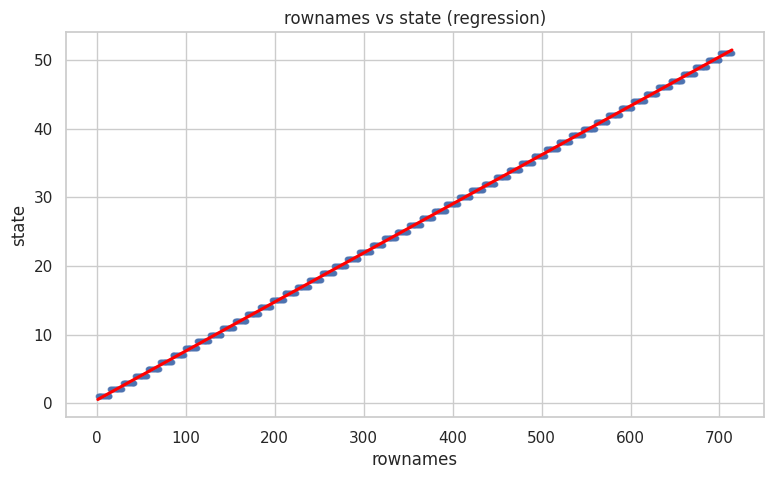

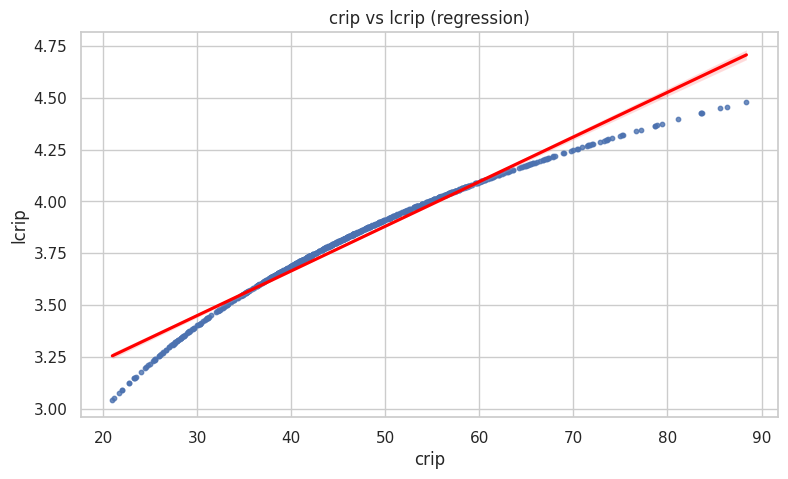

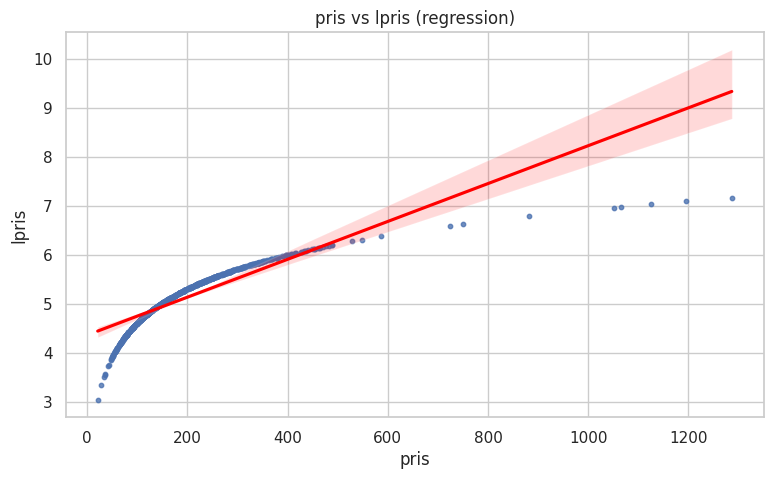

In [52]:
print("\n=== 2D ANALYSIS ===")

# 2A. Numerical vs Numerical: correlation & scatter + regression
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation matrix (all numeric cols)')
plt.show()

corr_pairs = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
corr_pairs = corr_pairs[corr_pairs < 1.0]  # exclude self
print("\nTop 10 absolute correlations:")
display(corr_pairs.head(10))

top_pairs = corr_pairs.head(3).index.tolist()
for (a,b) in top_pairs:
    plt.figure()
    sns.regplot(x=df[a], y=df[b], scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f'{a} vs {b} (regression)')
    plt.xlabel(a); plt.ylabel(b)
    plt.show()

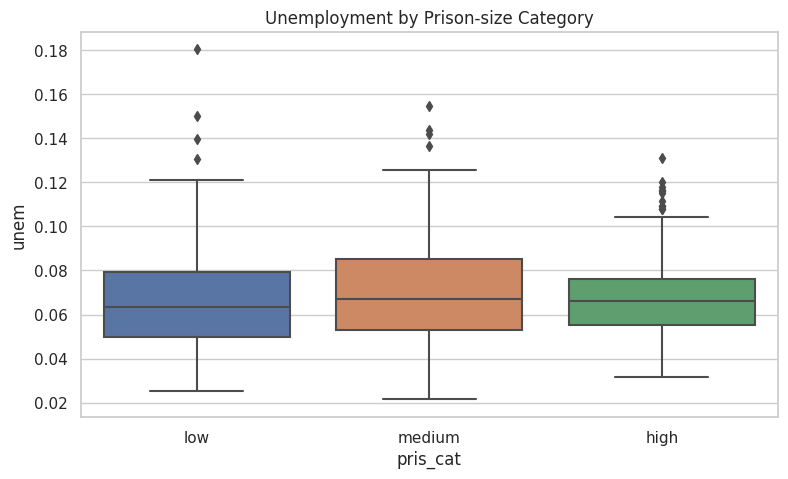

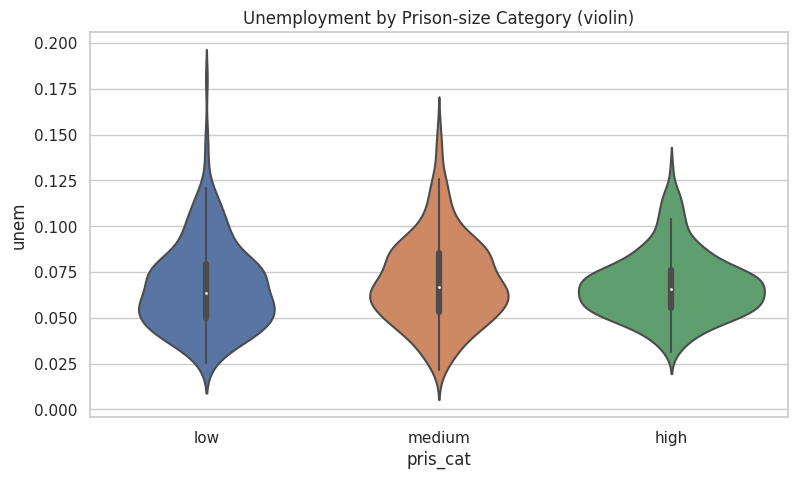

In [53]:
# 2B. Numerical vs Categorical
if 'pris_cat' in df.columns:
    plt.figure()
    sns.boxplot(x='pris_cat', y='unem', data=df, order=['low','medium','high'])
    plt.title('Unemployment by Prison-size Category')
    plt.show()

    # also violin
    plt.figure()
    sns.violinplot(x='pris_cat', y='unem', data=df, order=['low','medium','high'])
    plt.title('Unemployment by Prison-size Category (violin)')
    plt.show()

In [54]:
df['decade'] = pd.cut(df['year'], bins=[1980,1990,2000], labels=['1980s','1990s'])
ctab = pd.crosstab(df['decade'], df['pris_cat'])
print("\nCross-tabulation (Decade vs Prison Category):\n", ctab)

if not ctab.empty:
    sns.heatmap(ctab, annot=True, fmt='d', cmap='YlGnBu')
    plt.title("Decade vs Prison-size Category")
    plt.show()


Cross-tabulation (Decade vs Prison Category):
 Empty DataFrame
Columns: []
Index: []


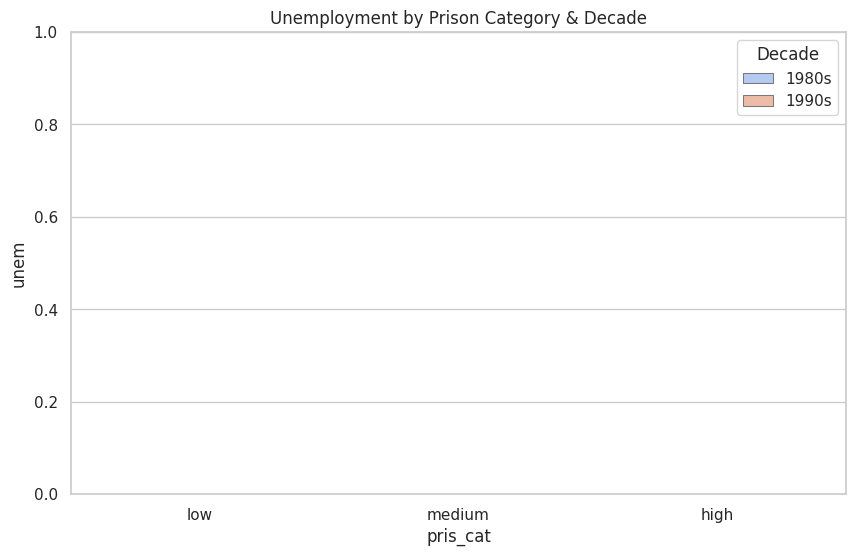

In [55]:
# 3D Analysis: Unemployment by Prison Category & Decade
plt.figure(figsize=(10,6))
sns.boxplot(x='pris_cat', y='unem', hue='decade', data=df, palette='coolwarm')
plt.title("Unemployment by Prison Category & Decade")
plt.legend(title='Decade')
plt.show()


=== MODULE 5: K-MEANS CLUSTERING ===

Cluster Counts:
 cluster
1    360
0    340
2     14
Name: count, dtype: int64


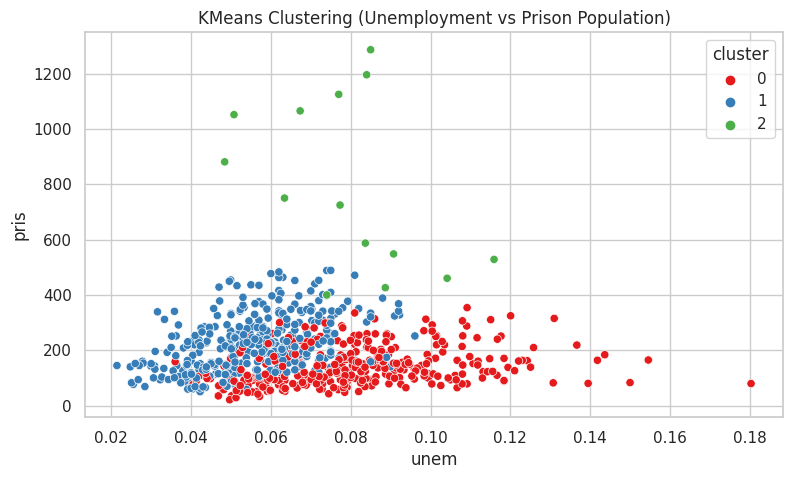

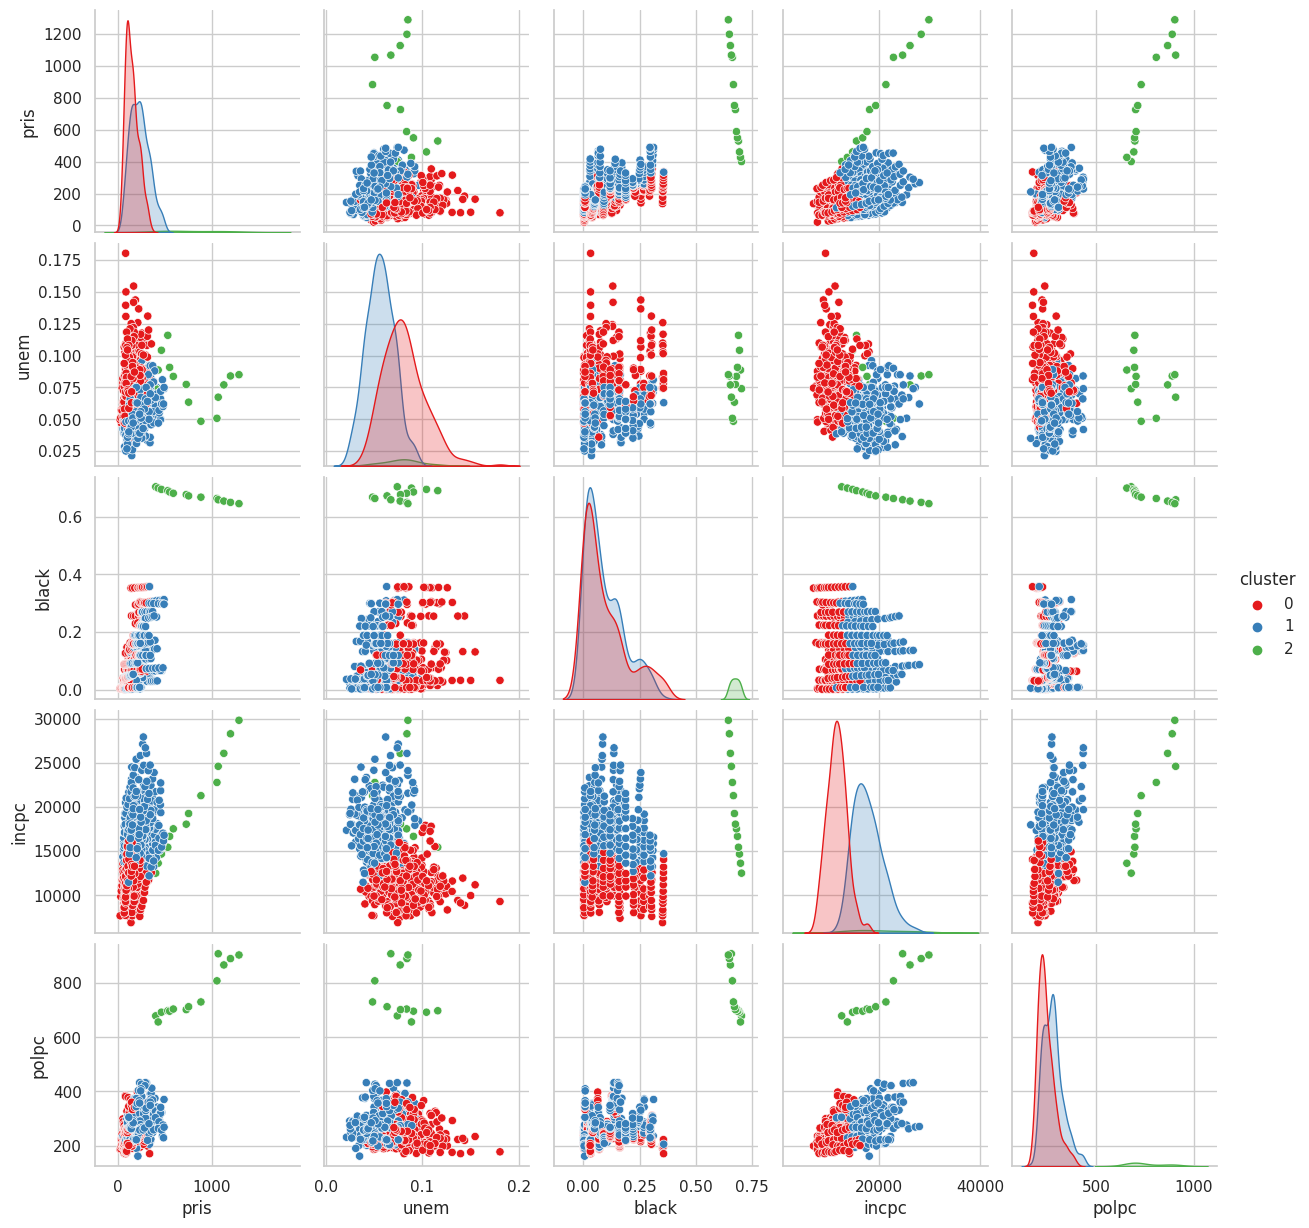

In [56]:
print("\n=== MODULE 5: K-MEANS CLUSTERING ===")

X = df[['pris','unem','black','incpc','polpc']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster Counts:\n", df['cluster'].value_counts())

# Visualize clusters
sns.scatterplot(x='unem', y='pris', hue='cluster', data=df, palette='Set1')
plt.title("KMeans Clustering (Unemployment vs Prison Population)")
plt.show()

sns.pairplot(df[['pris','unem','black','incpc','polpc','cluster']], hue='cluster', palette='Set1')
plt.show()